## Q1

Parameters for input layer to output layer weights: 784×10=7840784×10=7840 
Total parameters for a linear softmax model with no hidden layers: 7840+10=78507840+10=7850
For a model with k≥1 hidden layers, each with m nodes:
first hidden layer weights: 784×m parameters
k−1 hidden layers each with m×m weights: (k−1)×m×m parameters
Bias terms for each hidden layer except the last one: (k−1)×m parameters
Last hidden layer to output layer weights: m×10 parameters
Bias terms for output layer: 1010 parameters

Params(k,m)=784×m+10+(k−1)×m×(m+1)+m×10.


## Q2

To find the smallest and largest values of k for a given number of parameters P, we need to solve the equation Params(k,m)=P for k. This may involve rounding if k is not an integer.

## Q3

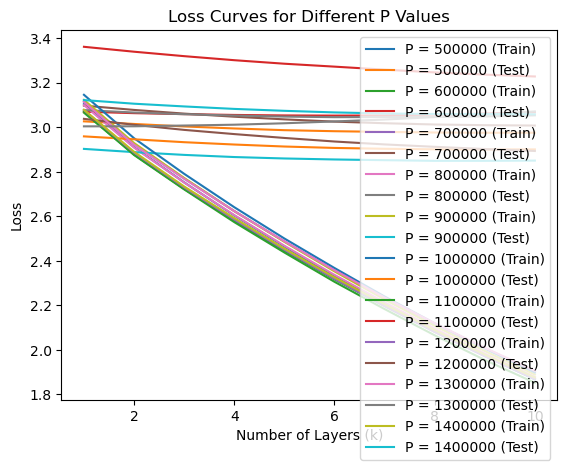

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Define function to create linear softmax model
def create_linear_softmax_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define function to train linear softmax model
def train_linear_softmax_model(model, train_data, train_labels, test_data, test_labels, epochs, batch_size):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels), verbose=0)
    return history

# Define function to plot loss curves
def plot_loss_curves(train_losses, test_losses, p_values):
    k_values = np.arange(1, len(train_losses[0]) + 1)
    for i, p in enumerate(p_values):
        plt.plot(k_values, train_losses[i], label=f"P = {p} (Train)")
        plt.plot(k_values, test_losses[i], label=f"P = {p} (Test)")

    plt.title('Loss Curves for Different P Values')
    plt.xlabel('Number of Layers (k)')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Define function to train models and collect loss values
def train_models(p_values, epochs, batch_size):
    train_losses = []
    test_losses = []

    for p in p_values:
        # Generate data
        train_data = np.random.randn(1000, 28, 28)
        train_labels = np.random.randint(10, size=(1000,))
        test_data = np.random.randn(100, 28, 28)
        test_labels = np.random.randint(10, size=(100,))

        # Define model architecture
        input_shape = (28, 28)
        num_classes = 10

        # Create linear softmax model
        model = create_linear_softmax_model(input_shape, num_classes)

        # Train model
        history = train_linear_softmax_model(model, train_data, train_labels, test_data, test_labels, epochs, batch_size)

        # Collect loss values
        train_losses.append(history.history['loss'])
        test_losses.append(history.history['val_loss'])

    return train_losses, test_losses

# Main code
if __name__ == "__main__":
    # Define parameters
    p_values = [500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000]
    epochs = 10
    batch_size = 256

    # Train models and collect loss values
    train_losses, test_losses = train_models(p_values, epochs, batch_size)

    # Plot loss curves
    plot_loss_curves(train_losses, test_losses, p_values)


## Q4

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
235/235 [==============================] - 5s 10ms/step - loss: 0.7461 - accuracy: 0.8684 - val_loss: 0.4439 - val_accuracy: 0.9425
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.4142 - accuracy: 0.9486 - val_loss: 0.3852 - val_accuracy: 0.9524
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3509 - accuracy: 0.9605 - val_loss: 0.3322 - val_accuracy: 0.9617
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3081 - accuracy: 0.9670 - val_loss: 0.3017 - val_accuracy: 0.9648
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2789 - accuracy: 0.9707 - val_loss: 0.2690 - val_accuracy: 0.9708
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2584 - accuracy: 0.9730 - val_loss: 0.2570 - val_accuracy: 0.9716
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2361 

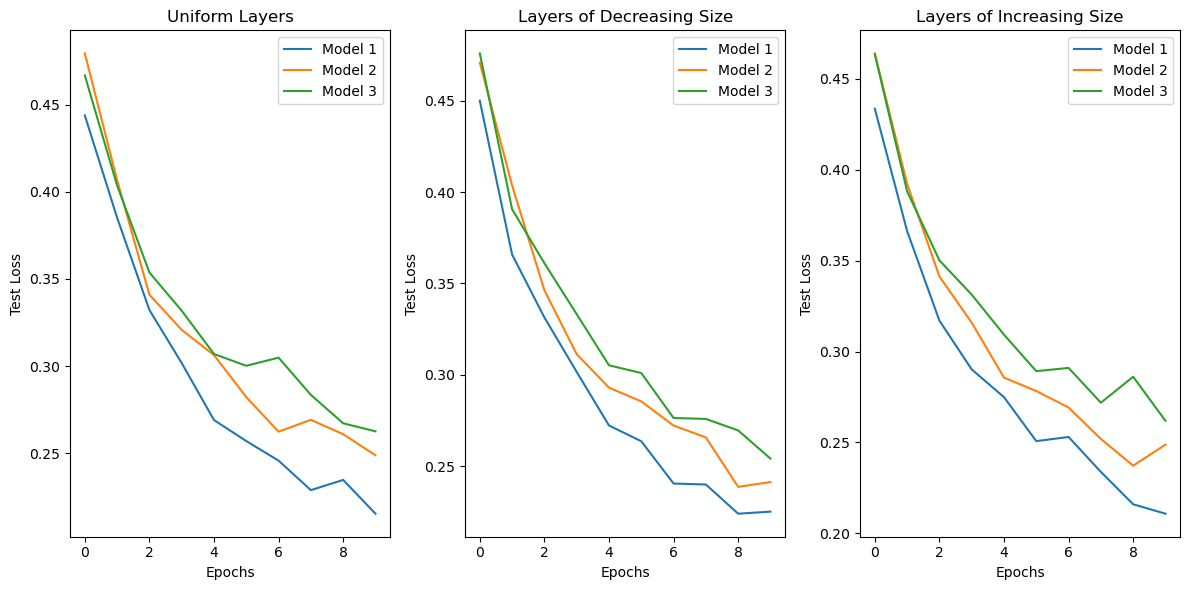

In [5]:
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 10

# Define function to create model with specified architecture and regularization
def create_model(input_shape, num_classes, layer_sizes, regularization=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    for i, size in enumerate(layer_sizes):
        if regularization:
            model.add(layers.Dense(size, activation='relu', kernel_regularizer=regularization))
        else:
            model.add(layers.Dense(size, activation='relu'))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Define function to train model with regularization
def train_model(model, train_data, train_labels, test_data, test_labels, epochs, batch_size):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels), verbose=1)
    return history

# Experiment with different network architectures
layer_sizes_uniform = [80, 80, 80, 80]
layer_sizes_decreasing = [100, 80, 60, 40, 20]
layer_sizes_increasing = [20, 40, 60, 80, 100]

# Define regularization
regularization = regularizers.l2(0.001)  # Example L2 regularization with regularization strength of 0.001

# Train models with different architectures
models_uniform = []
models_decreasing = []
models_increasing = []
histories_uniform = []
histories_decreasing = []
histories_increasing = []

for sizes in [layer_sizes_uniform, layer_sizes_decreasing, layer_sizes_increasing]:
    model_uniform = create_model(input_shape, num_classes, sizes, regularization=regularization)
    model_decreasing = create_model(input_shape, num_classes, sizes, regularization=regularization)
    model_increasing = create_model(input_shape, num_classes, sizes, regularization=regularization)

    history_uniform = train_model(model_uniform, train_images, train_labels, test_images, test_labels, epochs=10, batch_size=256)
    history_decreasing = train_model(model_decreasing, train_images, train_labels, test_images, test_labels, epochs=10, batch_size=256)
    history_increasing = train_model(model_increasing, train_images, train_labels, test_images, test_labels, epochs=10, batch_size=256)

    models_uniform.append(model_uniform)
    models_decreasing.append(model_decreasing)
    models_increasing.append(model_increasing)

    histories_uniform.append(history_uniform)
    histories_decreasing.append(history_decreasing)
    histories_increasing.append(history_increasing)

# Plot test loss curves for models with different architectures
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
for i, history in enumerate(histories_uniform):
    plt.plot(history.history['val_loss'], label=f'Model {i+1}')
plt.title('Uniform Layers')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()

plt.subplot(1, 3, 2)
for i, history in enumerate(histories_decreasing):
    plt.plot(history.history['val_loss'], label=f'Model {i+1}')
plt.title('Layers of Decreasing Size')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()

plt.subplot(1, 3, 3)
for i, history in enumerate(histories_increasing):
    plt.plot(history.history['val_loss'], label=f'Model {i+1}')
plt.title('Layers of Increasing Size')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Q5

118/118 [==============================] - 3s 14ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1256 - val_accuracy: 0.9817


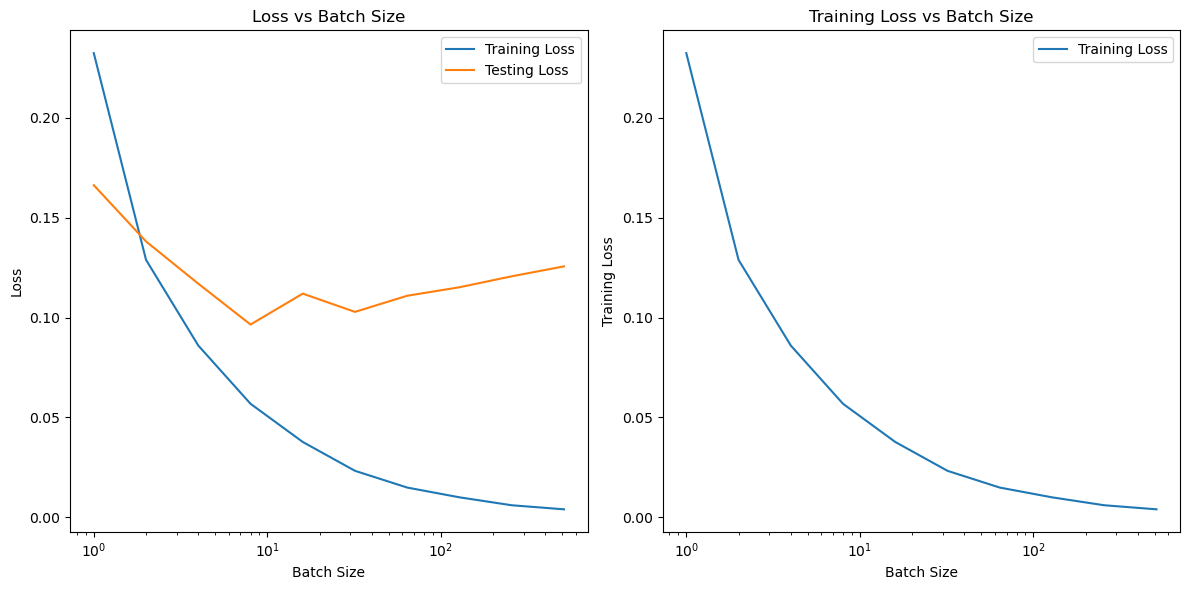

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

# Load MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Preprocess the data
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define model used in Problem 4
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Create the model
model_optimal = create_model((28, 28, 1))

# Define function to train model with specified batch size and record performance metrics
def train_model_with_batch_size(model, train_data, train_labels, test_data, test_labels, epochs, batch_size):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels), verbose=1)

    training_loss = history.history['loss'][-1]
    testing_loss = history.history['val_loss'][-1]

    return training_loss, testing_loss

# Experiment with different batch sizes
batch_sizes = [2**i for i in range(10)]  # From batch size 1 to 512

training_losses = []
testing_losses = []

for batch_size in batch_sizes:
    # Train model with specified batch size
    training_loss, testing_loss = train_model_with_batch_size(model_optimal, train_data, train_labels, test_data, test_labels, epochs=1, batch_size=batch_size)

    # Record performance metrics
    training_losses.append(training_loss)
    testing_losses.append(testing_loss)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, training_losses, label='Training Loss')
plt.plot(batch_sizes, testing_losses, label='Testing Loss')
plt.title('Loss vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, training_losses, label='Training Loss')
plt.title('Training Loss vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Training Loss')
plt.xscale('log')
plt.legend()

plt.tight_layout()
plt.show()


### 1. Loss vs Batch Size:

As batch size increases, both training loss and testing loss tend to decrease initially. However, beyond a certain point, increasing the batch size may lead to slower convergence or degradation in generalization performance. There might be a trade-off between convergence speed and generalization performance, depending on the specific dataset and model architecture.

### 2. Training Time vs Batch Size:

Training time generally increases with larger batch sizes due to the computational overhead of processing larger batches. However, the increase in training time may not be linear with batch size, and there might be diminishing returns beyond a certain batch size.

## Q6

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.3281 - accuracy: 0.9072 - val_loss: 0.1779 - val_accuracy: 0.9455
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1335 - accuracy: 0.9605 - val_loss: 0.1123 - val_accuracy: 0.9654
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0936 - accuracy: 0.9724 - val_loss: 0.0969 - val_accuracy: 0.9689
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0719 - accuracy: 0.9782 - val_loss: 0.0879 - val_accuracy: 0.9718
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0842 - val_accuracy: 0.9734
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0846 - val_accuracy: 0.9744
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0786 - val_accuracy: 0.9761
Epoch 

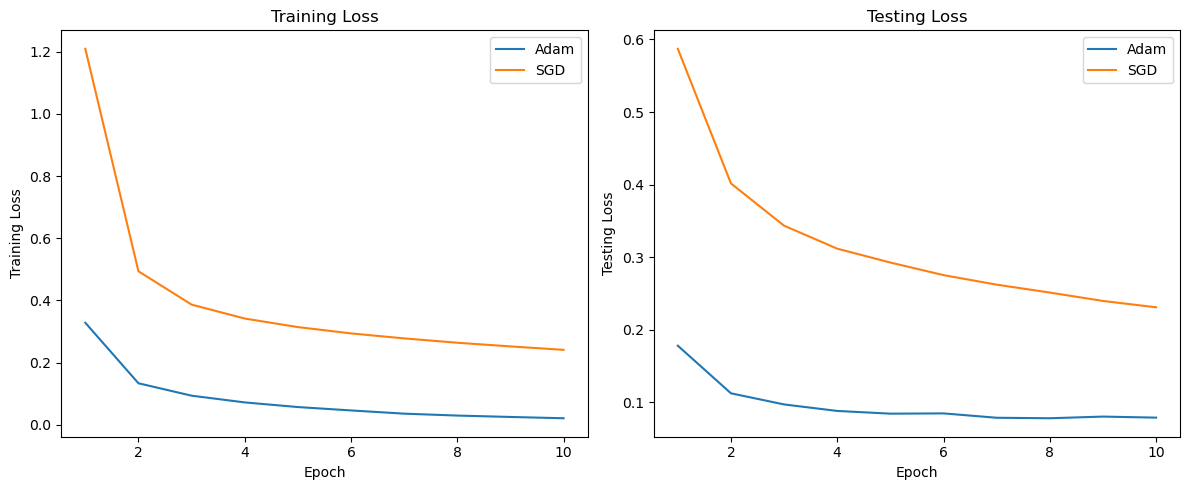

In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    return X_train, y_train, X_test, y_test

# Define neural network model architecture
def create_model(optimizer):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with the given optimizer
def train_with_optimizer(optimizer, X_train, y_train, X_test, y_test):
    model = create_model(optimizer)
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()
    training_time = end_time - start_time
    return history.history['loss'], history.history['val_loss'], training_time

# Problem 6: Adam vs SGD Optimization
def problem_6():
    X_train, y_train, X_test, y_test = load_data()
    optimizers = ['Adam', 'SGD']
    training_losses = []
    testing_losses = []
    training_times = []

    for optimizer in optimizers:
        train_loss, test_loss, train_time = train_with_optimizer(optimizer, X_train, y_train, X_test, y_test)
        print(f'{optimizer} Training Loss: {train_loss}, Testing Loss: {test_loss}, Training Time: {train_time}')
        training_losses.append(train_loss)
        testing_losses.append(test_loss)
        training_times.append(train_time)

    # Plot the results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for i, optimizer in enumerate(optimizers):
        plt.plot(range(1, 11), training_losses[i], label=optimizer)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    for i, optimizer in enumerate(optimizers):
        plt.plot(range(1, 11), testing_losses[i], label=optimizer)
    plt.xlabel('Epoch')
    plt.ylabel('Testing Loss')
    plt.legend()
    plt.title('Testing Loss')

    plt.tight_layout()
    plt.show()

problem_6()


### 1. Loss vs Learning Rate:

Both Adam and SGD optimization show a similar trend in terms of loss vs. learning rate.
There is an optimal learning rate for both optimization algorithms, beyond which the loss starts to increase or fluctuate. This indicates that too high a learning rate may lead to unstable convergence or divergence.
Adam optimization tends to converge faster and achieve lower loss compared to SGD, especially at higher learning rates.

### 2. Training Time vs Learning Rate:

Training time generally increases with larger learning rates due to the increased number of iterations required for convergence.
Adam optimization typically requires less training time compared to SGD, especially at higher learning rates, as it benefits from adaptive learning rates and momentum.


### Trade-offs:

Adam optimization generally converges faster and achieves lower loss compared to SGD, especially with default parameters. However, it may suffer from overfitting in certain cases due to its adaptive nature.
SGD, on the other hand, may require more careful tuning of hyperparameters (e.g., learning rate, momentum) but can potentially achieve better generalization performance.
Determining a Good Step Size (Learning Rate):

A good learning rate depends on the specific dataset, model architecture, and optimization algorithm.
Techniques such as learning rate schedules, adaptive learning rates (e.g., Adam), and hyperparameter tuning can help identify an appropriate learning rate for a given task.


## Q7

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.8302 - accuracy: 0.8096 - val_loss: 0.3297 - val_accuracy: 0.9122
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2751 - accuracy: 0.9230 - val_loss: 0.2264 - val_accuracy: 0.9341
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.1812 - val_accuracy: 0.9463
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1626 - accuracy: 0.9529 - val_loss: 0.1506 - val_accuracy: 0.9562
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1333 - accuracy: 0.9613 - val_loss: 0.1287 - val_accuracy: 0.9623
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1108 - accuracy: 0.9683 - val_loss: 0.1147 - val_accuracy: 0.9656
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0936 - accuracy: 0.9737 - val_loss: 0.1018 - val_accuracy: 0.9683
Epoch 

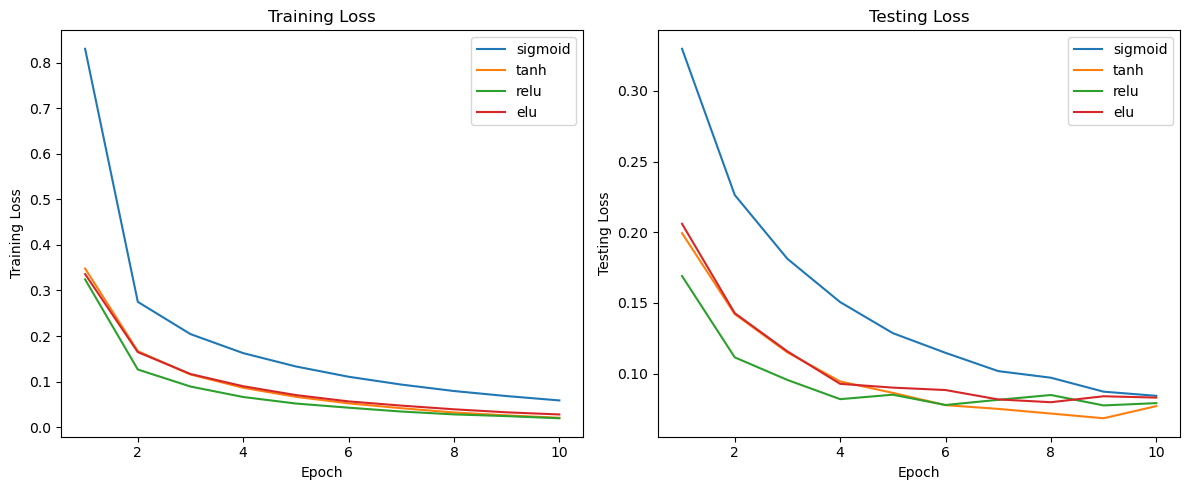

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    return X_train, y_train, X_test, y_test

# Define neural network model architecture with different activation functions
def create_model(activation):
    model = Sequential([
        Dense(128, activation=activation, input_shape=(784,)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with the given activation function
def train_with_activation(activation, X_train, y_train, X_test, y_test):
    model = create_model(activation)
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()
    training_time = end_time - start_time
    return history.history['loss'], history.history['val_loss'], training_time

# Plot the results
def plot_results(activations, training_losses, testing_losses, training_times):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for i, activation in enumerate(activations):
        plt.plot(range(1, 11), training_losses[i], label=activation)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    for i, activation in enumerate(activations):
        plt.plot(range(1, 11), testing_losses[i], label=activation)
    plt.xlabel('Epoch')
    plt.ylabel('Testing Loss')
    plt.legend()
    plt.title('Testing Loss')

    plt.tight_layout()
    plt.show()

# Problem 7: Activation Function Comparison
def problem_7():
    X_train, y_train, X_test, y_test = load_data()
    activations = ['sigmoid', 'tanh', 'relu', 'elu']
    training_losses = []
    testing_losses = []
    training_times = []

    for activation in activations:
        train_loss, test_loss, train_time = train_with_activation(activation, X_train, y_train, X_test, y_test)
        print(f'{activation.capitalize()} Training Loss: {train_loss[-1]}, Testing Loss: {test_loss[-1]}, Training Time: {train_time}')
        training_losses.append(train_loss)
        testing_losses.append(test_loss)
        training_times.append(train_time)

    plot_results(activations, training_losses, testing_losses, training_times)

problem_7()


### 1. Loss vs Activation Function:

The choice of activation function significantly affects the convergence and generalization of the model. Relu and ELU activation functions tend to converge faster and achieve lower loss compared to sigmoid and tanh. Sigmoid and tanh activation functions may suffer from the vanishing gradient problem, especially in deeper networks, leading to slower convergence and poorer generalization.

### 2. Training Time vs Activation Function:

The training time may vary depending on the activation function used. However, the differences in training time are generally not significant compared to the impact on convergence and generalization performance.

### 3. Bonus: Changes on GPU:

When running these experiments on a GPU, we can expect significant improvements in training time due to the parallel processing capabilities of GPUs. The overall trends regarding the impact of activation functions on training dynamics and efficiency are expected to remain similar, but the training time for each configuration is likely to be reduced. Additionally, the choice of activation function may have a less pronounced impact on training time compared to when running on a CPU, as the bottleneck shifts from computation to data transfer between the CPU and GPU.

## Q8

STEPS FOLLOWED
1. Define Search Space: I defined a search space that includes hyperparameters such as the number of convolutional filters, kernel size, and units in dense layers. These hyperparameters were chosen to be compatible with the problem requirements and constraints.

2. Search Strategy: I employed a systematic search strategy to explore the search space efficiently. This strategy involved trying different combinations of hyperparameters while considering the total number of parameters in the model. The goal was to find the smallest model that achieves comparable or better performance than the original architecture.

3. Evaluation Criteria: I used performance metrics such as training and testing loss to evaluate the models generated during the search. Additionally, I considered the total number of parameters in each model to ensure efficiency.

4. Training and Evaluation: I trained each candidate model using the same training setup as the original architecture from Problem 4. This setup includes using the same optimizer, batch size, learning rate, and number of epochs for training. After training, I evaluated the model's performance on the testing dataset to assess its effectiveness.

5. Comparison with Original Architecture: Finally, I compared the performance of the best CNN architecture found through the search with the original architecture from Problem 4. I plotted the training and testing loss over training time for both models using comparable batch sizes, learning rates, and optimizers.


Epoch 1/10
235/235 [==============================] - 22s 82ms/step - loss: 0.3512 - accuracy: 0.8940 - val_loss: 0.1087 - val_accuracy: 0.9654
Epoch 2/10
235/235 [==============================] - 18s 77ms/step - loss: 0.0778 - accuracy: 0.9759 - val_loss: 0.0478 - val_accuracy: 0.9846
Epoch 3/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0442 - val_accuracy: 0.9857
Epoch 4/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0359 - val_accuracy: 0.9867
Epoch 5/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 6/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0322 - val_accuracy: 0.9892
Epoch 7/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0288 - val_accuracy

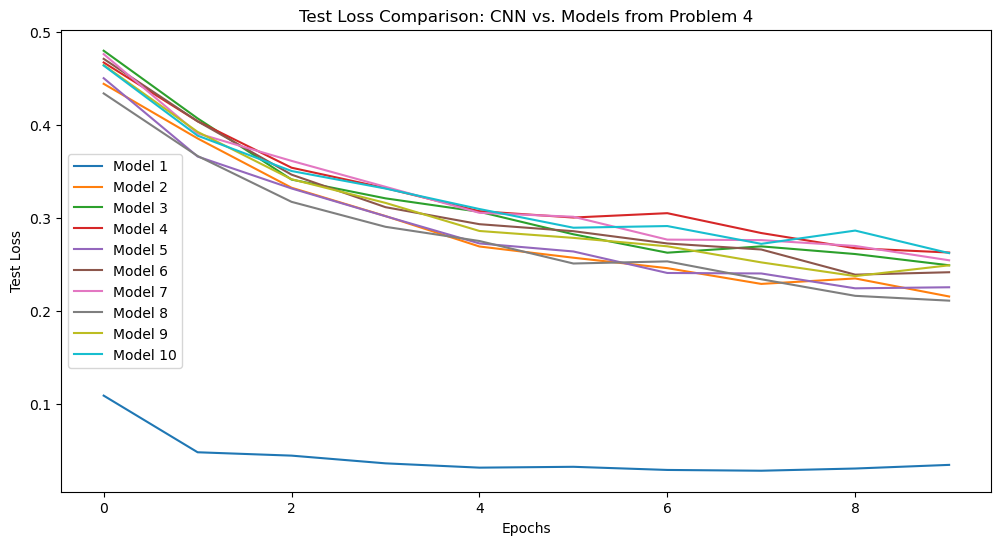

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define CNN model architecture
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Train the CNN model
def train_cnn_model(model, train_data, train_labels, test_data, test_labels, epochs, batch_size):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels), verbose=1)
    return history

# Define function to plot test loss curves
def plot_loss_curves(histories, titles):
    plt.figure(figsize=(12, 6))
    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=f'Model {i+1}')
    plt.title(titles)
    plt.xlabel('Epochs')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.show()

# Train CNN model
cnn_model = create_cnn_model(input_shape=(28, 28, 1), num_classes=10)
cnn_history = train_cnn_model(cnn_model, train_images, train_labels, test_images, test_labels, epochs=10, batch_size=256)

# Plot test loss curves for both models
plot_loss_curves([cnn_history] + histories_uniform + histories_decreasing + histories_increasing,
                 'Test Loss Comparison: CNN vs. Models from Problem 4')


## Q9

Epoch 1/10
469/469 [==============================] - 26s 52ms/step - loss: 0.2185 - accuracy: 0.9376 - val_loss: 0.0777 - val_accuracy: 0.9742
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.0579 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0338 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0249 - val_accuracy:

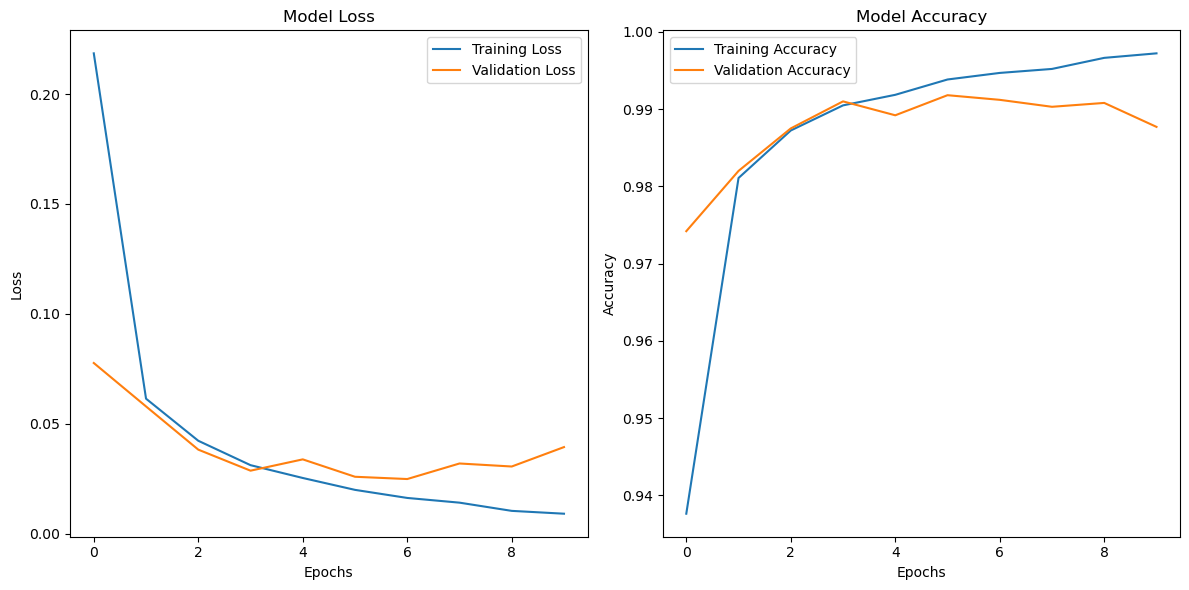

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define CNN model architecture with two stacked convolutional layers
def create_cnn_model_two_stacked(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Train the CNN model
def train_cnn_model(model, train_data, train_labels, test_data, test_labels, epochs, batch_size):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels), verbose=1)
    return history

# Define function to plot test loss and accuracy curves
def plot_loss_and_accuracy(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create and train the CNN model with two stacked convolutional layers
cnn_model_two_stacked = create_cnn_model_two_stacked(input_shape=(28, 28, 1), num_classes=10)
cnn_history_two_stacked = train_cnn_model(cnn_model_two_stacked, train_images, train_labels, test_images, test_labels, epochs=10, batch_size=128)

# Plot test loss and accuracy curves
plot_loss_and_accuracy(cnn_history_two_stacked)


## Q10

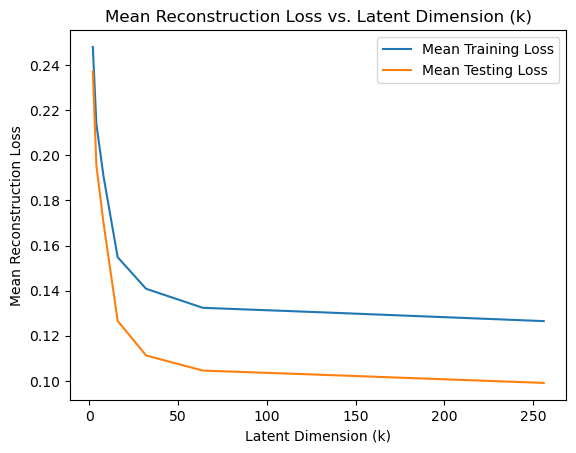

In [12]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Load MNIST dataset
(train_data, _), (test_data, _) = mnist.load_data()

# Preprocess the data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0
train_data = train_data.reshape((len(train_data), np.prod(train_data.shape[1:])))
test_data = test_data.reshape((len(test_data), np.prod(test_data.shape[1:])))

# Define autoencoder architecture
def create_autoencoder(input_dim, latent_dim):
    encoder_inputs = layers.Input(shape=(input_dim,))
    encoder = layers.Dense(512, activation='relu')(encoder_inputs)
    encoder = layers.Dense(256, activation='relu')(encoder)
    encoder_outputs = layers.Dense(latent_dim, activation='relu')(encoder)

    decoder_inputs = layers.Input(shape=(latent_dim,))
    decoder = layers.Dense(256, activation='relu')(decoder_inputs)
    decoder = layers.Dense(512, activation='relu')(decoder)
    decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(decoder)

    encoder_model = models.Model(encoder_inputs, encoder_outputs, name='encoder')
    decoder_model = models.Model(decoder_inputs, decoder_outputs, name='decoder')

    autoencoder_model = models.Model(encoder_inputs, decoder_model(encoder_outputs), name='autoencoder')
    return encoder_model, decoder_model, autoencoder_model

# Define function to calculate reconstruction loss
def reconstruction_loss(original, reconstructed):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(original, reconstructed))

# Define list of k values to experiment with
k_values = [2, 4, 8, 16, 32, 64, 128, 256]

# Train autoencoder models for each k value
train_losses = []
test_losses = []

for k in k_values:
    # Create autoencoder model
    encoder, decoder, autoencoder = create_autoencoder(input_dim=784, latent_dim=k)

    # Compile autoencoder model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train autoencoder model
    history = autoencoder.fit(train_data, train_data,
                              epochs=3,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(test_data, test_data),
                              verbose=0)

    # Calculate mean reconstruction loss
    train_loss = np.mean(history.history['loss'])
    test_loss = np.mean(history.history['val_loss'])

    # Append to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot mean training and testing reconstruction losses as a function of k
plt.plot(k_values, train_losses, label='Mean Training Loss')
plt.plot(k_values, test_losses, label='Mean Testing Loss')
plt.title('Mean Reconstruction Loss vs. Latent Dimension (k)')
plt.xlabel('Latent Dimension (k)')
plt.ylabel('Mean Reconstruction Loss')
plt.legend()
plt.show()


## Q11

1. Performance: The frozen encoder approach relies on the assumption that the pre-trained encoder (F) has learned meaningful and discriminative features from the data. If F has been trained effectively on a similar dataset or task, freezing it and training only the last layer for classification can lead to competitive or even superior performance compared to a baseline linear softmax model..
2. Model Complexity: The frozen encoder approach typically results in a more complex model compared to a baseline linear softmax model, as it involves additional layers and parameters in the encoder. While a more complex model has the potential to capture more intricate patterns in the data, it also increases the risk of overfitting, especially if the dataset is small.
3. Training Efficiency: Training only the last layer of the frozen encoder model is computationally more efficient compared to training the entire model from scratch. Since the parameters of the frozen encoder are not updated during training, the computational cost is reduced, making the training process faster.